In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML model
from sklearn.linear_model import RidgeClassifier

# Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# pipeline visualization (only if sklearn version = 0.23.1)
from sklearn import set_config
set_config(display='diagram')

In [26]:
'toy dataset'
n = 100 # size of the dataset
y = np.zeros(n) # initialize y
x = np.zeros((n,1)) # initialize x

y[0:20] = 1
x[0:20,0] = 5+np.random.rand(20)

y[20:40] = -1
x[20:40,0] = 3+np.random.rand(20)

y[40:60] = -1
x[40:60,0] =  1+np.random.rand(20)

y[60:80] = 1
x[60:80,0] = np.random.rand(20)

y[80:100] = -1
x[80:100,0] = -1+np.random.rand(20)

Text(0.5, 1.0, 'A toy dataset')

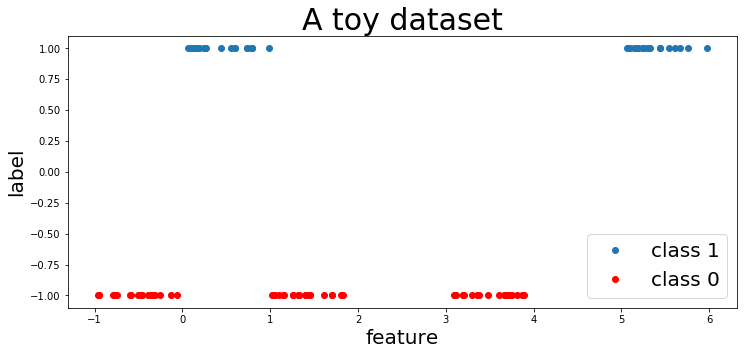

In [27]:
plt.figure(figsize=(12,5))
plt.plot(x[y==1],y[y==1],'o', label='class 1')
plt.plot(x[y==-1],y[y==-1],'ro', label='class 0')
plt.legend(fontsize=20)
plt.xlabel('feature', fontsize=20)
plt.ylabel('label', fontsize=20)
plt.title('A toy dataset', fontsize=30)

In [28]:
# pipeline
pipe = Pipeline(steps = [
    ('poly_features', PolynomialFeatures()),
    ('clf', RidgeClassifier(alpha=0))
])
pipe

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('clf', RidgeClassifier(alpha=0))])

In [29]:
parameters_grid = {'poly_features__degree' : list(range(1,50))} # ,50,100,200,500,1000

In [30]:
grid = GridSearchCV(pipe, parameters_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly_features', PolynomialFeatures()),
                                       ('clf', RidgeClassifier(alpha=0))]),
             param_grid={'poly_features__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [32]:
# view the results
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
grid_results

,mean_test_score,params
0,0.62,{'poly_features__degree': 1}
1,0.73,{'poly_features__degree': 2}
2,0.76,{'poly_features__degree': 3}
3,0.95,{'poly_features__degree': 4}
4,0.94,{'poly_features__degree': 5}
5,0.93,{'poly_features__degree': 6}
6,0.95,{'poly_features__degree': 7}
7,0.95,{'poly_features__degree': 8}
8,0.95,{'poly_features__degree': 9}
9,0.97,{'poly_features__degree': 10}


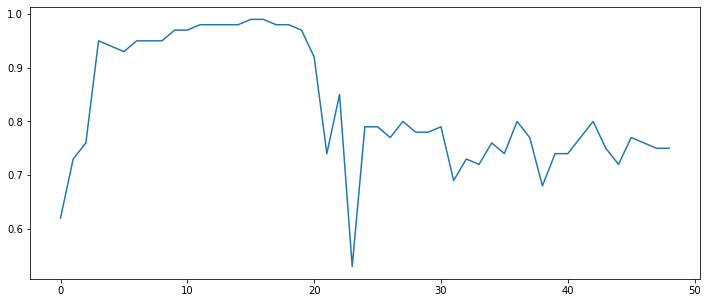

In [36]:
grid_results.mean_test_score.plot(figsize=(12,5))

In [37]:
# pipeline with fixed degree
pipe = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree=24)),
    ('clf', RidgeClassifier())
])

In [41]:
# regularization parameter
parameters_grid = {'clf__alpha' : [0,0.01,0.1,1,10,100,1000]}

In [42]:
grid = GridSearchCV(pipe, parameters_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(degree=24)),
                                       ('clf', RidgeClassifier())]),
             param_grid={'clf__alpha': [0, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [43]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,0.53,{'clf__alpha': 0}
1,0.57,{'clf__alpha': 0.01}
2,0.54,{'clf__alpha': 0.1}
3,0.64,{'clf__alpha': 1}
4,0.68,{'clf__alpha': 10}
5,0.70,{'clf__alpha': 100}
6,0.71,{'clf__alpha': 1000}
